In [1]:
import sys
sys.path.append('../..')
sys.path.append('../../../../transformer_pytorch')
%load_ext autoreload
%autoreload 2



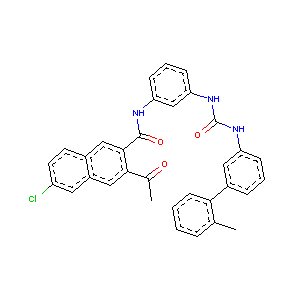

In [2]:

from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem.Draw import MolToImage, MolToFile, _moltoSVG, MolsToGridImage

smile1 = 'c1nnn(nnn2)c2c1'
smile7 = 'c1cnnc2n1ncc2'
smile6 = 'c1c(Cl)ccc2c1cc(C(=O)C)c(C(=O)Nc3cc(NC(=O)Nc4cc(c5ccccc5(C))ccc4)ccc3)c2'
smile2='OC(=O)O'
smile3 ='c1cccc1'
smile4 = 'C(=C=Nc1c(c2c(OOI)cncn2)nc(Br)c2n1c(I)c(OO)c2)'
smile5 = 'C(OS(=O)(=O))C1SNC(c2c(I)c(NN=O)c(c3cc(F)ccc3C#C)cc2Cl)C(=Nc2nc(S(=O)(=O))c(c3nc(C(c4c(C#N)nnc5n4nnn5)F)nc4n3cnc4c3cnncc3N=C(S)c3c(F)cnc(I)n3)c3n2cnn3)N(SI)NC(F)O1'
smile8 = 'Oc1cc(O)oc1'
smile9 ='Clc1c(c2cnc([C@@][C@@]c3nnc([C@@H]CCS(=O)(=O))c4n3c(c3cnc()c5n3c([C@@]([C@@]([C@@][C@])))cn5)cn4)c3n2nnn3)nnc2n1nnn2'#'[O-]c1nc(O)cc1[C@@][C@]-c1cscc1'
smile9 = 'c5c(c6cnncc6)n(O)nn5'
smile10 ='C/C(O)=C(S)/S'
smile11 ='C(=O)NH(c3cc(NC(=O)Nc4cc(c5cc(F)ccc5)ccc4)ccc3)'
kusner1 ='CCCc1ccc(I)cc1C1CCC-c1'
kusner2 ='CC(C)CCCCCc1ccc(Cl)nc1'
kusner3 ='CCCc1ccc(Cl)cc1CCCCOC'
mol_bad ='c1nc(S(=O)(=O)[N+](=[C@H][C@H](N2[NH+]=[C@H][C@H](S(=O)(=O)N=[C@H][NH+]=N3)[C@H]3[C@H]2)[C@H]([C@@][C@@](S(=O)(=O))([C@H]([C@@](=O)S[C@](c2c([N+](=NN=[C@@H][C@@H]=[C@H][C@@]3(=[NH+]))[C@@]3(S(=O)(=O)[C@@](#C))[C@@](=[NH+][C@H]=[C@H]S(=O)(=O)[C@@H]=[C@H][C@@]3(=[NH+]Br))[C@]3)c([C@]([C@@](=[N+](c3ccn([C@]4(N([NH+]=[C@H][N+]([NH3+])=[NH+][C@@](=[C@H]S(=O)(=O)[N+](C(N[NH+]=NO3)=[C@@]3[C@@H]=[C@H]3)=[C@]3O3)[C@@H]3S3(=O)(=O))[NH+]3[C@@H]=[C@H]4)/[C@@H]=N\S)n3)N=[C@@H]S4(=O)(=O))[C@H]4Br)S(=O)(=O)S(=O)(=O)S4)c4cc2)=[C@H]2)[C@@H]2SO2)N2O2)[C@@H]2S2)[C@@H]2S2(=O)(=O))c2o1'
mol_bad ='c1nc([N+](=[C@H]([C@@][C@@]([C@H]([C@@](=O)S[C@](c2c([N+]([C@@](#C))[C@@])c([C@]([C@@](=[N+](c3ccn([C@]4(N([NH+]=[C@H][N+]=[NH+][C@@](=[C@H][N+](C(N[NH+]=NO3)=[C@@]3[C@@H]=[C@H]3)=[C@]3O3)[C@@H]3S3(=O)(=O))[NH+]3[C@@H]=[C@H]4)/[C@@H]=N\S)n3)N=[C@@H]S4(=O)(=O))[C@H]4Br)S4)c4cc2)=[C@H]2)[C@@H]2SO2)N2O2)[C@@H]2S2)[C@@H]2S2(=O)(=O))c2o1'

mol = Chem.MolFromSmiles(smile6)

MolToImage(mol, kekulize=False)

In [3]:
import numpy as np
from generative_playground.rdkit_utils.rdkit_utils import num_atoms, num_aromatic_rings, num_aliphatic_rings, NormalizedScorer
scorer = NormalizedScorer()
[np.sum(x) for x in scorer.get_scores([kusner3])]

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


******************************
smiles -> nonH_bond
smiles -> initial_valence_1
smiles -> initial_valence_1 nonH_bond
smiles -> initial_valence_2 double_bond
smiles -> initial_valence_3 triple_bond
initial_valence_1 -> 'F'
initial_valence_1 -> 'Cl'
initial_valence_1 -> 'Br'
initial_valence_1 -> 'I'
initial_valence_1 -> '[' 'O' '-' ']'
initial_valence_1 -> '[' 'N' 'H' '3' '+' ']'
initial_valence_2 -> 'O'
initial_valence_2 -> 'S'
initial_valence_3 -> '[' 'C' '@' 'H' ']'
initial_valence_3 -> '[' 'C' '@' '@' 'H' ']'
initial_valence_3 -> 'N'
initial_valence_3 -> '[' 'N' 'H' '+' ']'
nonH_bond -> valence_1
nonH_bond -> valence_2
nonH_bond -> valence_2 nonH_bond
nonH_bond -> valence_3 double_bond
nonH_bond -> valence_4 triple_bond
double_bond -> '=' valence_2
double_bond -> '=' valence_3
double_bond -> '=' valence_3 nonH_bond
double_bond -> '=' valence_4 double_bond
triple_bond -> '#' valence_3
triple_bond -> '#' valence_4
triple_bond -> '#' valence_4 nonH_bond
valence_4 -> 'C'
valence_4 -> '['

improving: num -> '1' inf 1 [0]
added  {'token': valence_3_num, 'num': None, 'size': 8} from <frozendict {'token': cycle_double_bond, 'num': None, 'size': 7}> via cycle_double_bond -> '=' valence_3_num
added  {'token': num, 'num': None, 'size': 8} from <frozendict {'token': valence_2_num, 'num': None, 'size': 7}> via valence_2_num -> 'O' num
added  {'token': valence_4_num, 'num': None, 'size': 8} from <frozendict {'token': valence_2_num, 'num': None, 'size': 7}> via valence_2_num -> valence_4_num '(' double_bond ')'
added  {'token': valence_2_num, 'num': None, 'size': 9} from <frozendict {'token': cycle_bond, 'num': None, 'size': 8}> via cycle_bond -> valence_2_num
improving: num -> '1' inf 1 [0]
added  {'token': num, 'num': None, 'size': 9} from <frozendict {'token': valence_2_num, 'num': None, 'size': 8}> via valence_2_num -> 'O' num
added  {'token': valence_3_num, 'num': None, 'size': 9} from <frozendict {'token': valence_2_num, 'num': None, 'size': 8}> via valence_2_num -> valence_

[2.353205370805517, 2.7977435486158133]

In [4]:
MolToFile(mol, 'test.svg', imageType='svg')

In [5]:
from generative_playground.models.model_settings import get_decoder, get_settings

max_len = 40
settings = get_settings(True, 'new')

# Now let's run a random model with a grammar
model, _ = get_decoder(True,
                    'new',
                    feature_len=settings['feature_len'],
                    max_seq_length=max_len,
                    decoder_type='random',
                   batch_size=9)


['S=N', '[O-]', 'c1c2c(S[N+](=[C@][C@H]=[C@@H]O3)[C@@H]3OO2)n([NH+]=S(=O)(=O))c1', 'I', 'Cl[C@@](=CN(C(=S))(c1c([C@](=N)/C=N\\S)nco1))', 'c1ccc(N(C([C@@]=NOO2)=[C@]2SS2)N2)n2c1nnc2', 'O=[C@@H][N+](c1ncnc(S(=O)(=O)c2nncn2[C@@H]=[NH+])c1)=[C@@]=[C@H]', 'S=[C@@H]', '[C@@](=[C@]=O)\\[N+](Br)=[C@](c1ncnc2c1cccc2[NH+]=S)\\[C@@]([O-])']
[0, 0, 1, 0, 1, 3, 2, 0, 2]


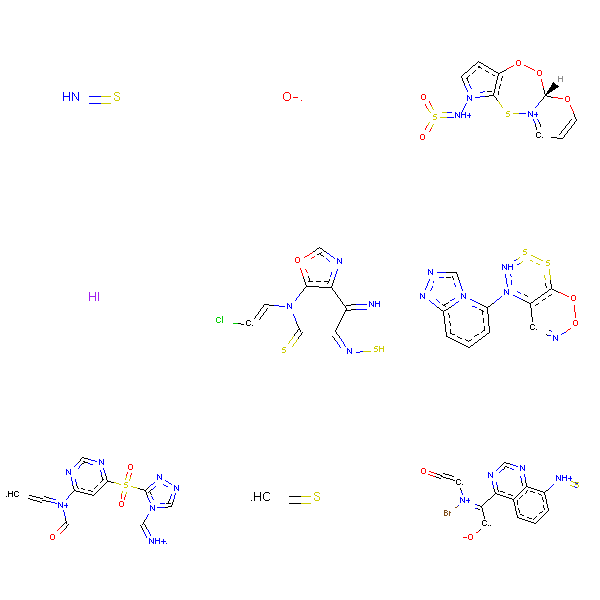

In [6]:
from generative_playground.codec.grammar_codec import GrammarModel
settings = get_settings(True, 'new')
codec = GrammarModel(grammar=settings['grammar'],
                    tokenizer=settings['tokenizer'])
actions = model()[0].detach().cpu().numpy()
#print(actions, settings['feature_len'])
my_smiles = codec.decode_from_actions(actions)
print(my_smiles)

mols = [Chem.MolFromSmiles(my_smile) for my_smile in my_smiles]
print([Descriptors.NumAromaticRings(m) for m in mols if m is not None])
MolsToGridImage(mols, kekulize=False)

In [7]:
#my_smiles.append'c1ccncn1']

def parse(x):
    # print(x)
    try:
        return next(codec._parser.parse(x))
    except Exception as e:
#         print('fail!')
#         print(e)
        return None
    
tokens = [codec._tokenize(s) for s in my_smiles]
parse_trees = [parse(t) for t in tokens]
print(parse_trees, len(parse_trees))


[Tree('smiles', [Tree('initial_valence_2', ['S']), Tree('double_bond', ['=', Tree('valence_3', ['N'])])]), Tree('smiles', [Tree('nonH_bond', [Tree('valence_1', ['[', 'O', '-', ']'])])]), Tree('smiles', [Tree('nonH_bond', [Tree('aromatic_ring_5', [Tree('starting_aromatic_c_num', ['c', Tree('num', ['1'])]), Tree('full_aromatic_segment', [Tree('side_aliphatic_ring_segment', ['c', Tree('num', ['2']), 'c', '(', Tree('cycle_bond', [Tree('valence_2', ['S']), Tree('cycle_bond', [Tree('aliphatic_ring_segment', [Tree('valence_4', ['[', 'N', '+', ']']), '(', Tree('cycle_double_bond', ['=', Tree('valence_3', [Tree('valence_4', ['[', 'C', '@', ']'])]), Tree('cycle_bond', [Tree('valence_3', ['[', 'C', '@', 'H', ']']), Tree('cycle_double_bond', ['=', Tree('valence_3', ['[', 'C', '@', '@', 'H', ']']), Tree('cycle_bond', [Tree('valence_2_num', ['O', Tree('num', ['3'])])])])])]), ')', Tree('valence_3_num', ['[', 'C', '@', '@', 'H', ']', Tree('num', ['3'])])]), Tree('cycle_bond', [Tree('valence_2', ['O']

In [31]:
fname = '../data/250k_rndm_zinc_drugs_clean.smi'

with open(fname) as f:
    smiles = f.readlines()

for i in range(len(smiles)):
    smiles[i] = smiles[i].strip()


In [34]:
tokens = [codec._tokenize(s) for s in smiles[:1000]]
parse_trees = [parse(t) for t in tokens]
parse_trees = [p for p in parse_trees if p is not None]

In [35]:
from nltk.tree import *
# tree = parse_trees[0]
# print(tree.label(), tree)

rpe_dict ={}

def get_rpe(tree, rpe_dict):
    these_tuples = [(tree.label(), loc, child.label()) for loc,child in enumerate(tree) if isinstance(child,Tree)]
    for t in these_tuples:
        if t in rpe_dict:
            rpe_dict[t] += 1
        else: rpe_dict[t] = 1
    for subtree in tree:
        if isinstance(subtree, Tree):
            rpe_dict = get_rpe(subtree, rpe_dict)
    return rpe_dict
for tree in parse_trees:
    rpe_dict = get_rpe(tree,rpe_dict)
#print(rpe_dict)
rpe_count = [(key, value) for key, value in rpe_dict.items()]
rpe_count = sorted(rpe_count, key = lambda x:x[1],reverse = True)
print(len(parse_trees))
for x in rpe_count:
    print(x)


306
(('valence_2', 0, 'valence_3'), 2273)
(('nonH_bond', 0, 'valence_2'), 1761)
(('nonH_bond', 1, 'nonH_bond'), 1760)
(('valence_3', 0, 'valence_4'), 1745)
(('full_aromatic_segment', 0, 'aromatic_atom'), 770)
(('full_aromatic_segment', 1, 'aromatic_atom'), 770)
(('cycle_bond', 0, 'valence_2'), 696)
(('cycle_bond', 1, 'cycle_bond'), 696)
(('nonH_bond', 0, 'valence_1'), 667)
(('starting_aromatic_c_num', 1, 'num'), 445)
(('valence_1', 0, 'valence_2'), 418)
(('valence_2', 2, 'nonH_bond'), 387)
(('aromatic_atom_num', 1, 'num'), 384)
(('aromatic_atom', 2, 'nonH_bond'), 363)
(('nonH_bond', 0, 'aromatic_ring_6'), 343)
(('aromatic_ring_6', 0, 'starting_aromatic_c_num'), 343)
(('aromatic_ring_6', 1, 'full_aromatic_segment'), 343)
(('aromatic_ring_6', 2, 'full_aromatic_segment'), 343)
(('aromatic_ring_6', 3, 'aromatic_atom_num'), 343)
(('double_bond', 1, 'valence_2'), 315)
(('valence_2', 0, 'valence_4'), 305)
(('valence_2', 2, 'double_bond'), 305)
(('smiles', 0, 'nonH_bond'), 263)
(('valence_4_nu

29645
29645


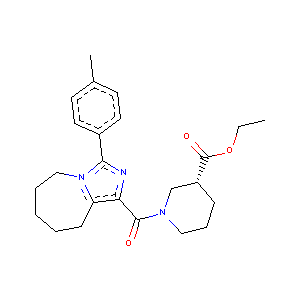

In [13]:
dashsmiles = [x for x in smiles if '-c' in x]
print(len(dashsmiles))
mols = [Chem.MolFromSmiles(s.replace('-c','c')) for s in dashsmiles]
mols =[m for m in mols if m is not None]
print(len(mols))
MolToImage(mols[2], kekulize=False)

In [14]:
tokens = [codec._tokenize(s.replace('-c','c')) for s in smiles[:1000]]
parse_trees = [parse(t) for t in tokens]
nice = [ip for ip, p in enumerate(parse_trees) if p is not None]
print(len(nice), nice)

362 [1, 2, 5, 6, 7, 16, 17, 26, 35, 36, 41, 43, 44, 48, 53, 55, 56, 57, 68, 71, 76, 77, 79, 80, 81, 89, 90, 93, 95, 99, 101, 104, 109, 110, 115, 116, 117, 118, 125, 126, 132, 133, 134, 137, 138, 139, 141, 144, 148, 149, 150, 151, 152, 154, 155, 156, 159, 160, 161, 163, 166, 171, 172, 177, 179, 182, 188, 189, 190, 193, 197, 199, 201, 204, 207, 209, 211, 216, 224, 225, 229, 236, 237, 239, 241, 244, 245, 246, 248, 249, 250, 251, 255, 256, 258, 264, 265, 268, 276, 278, 281, 283, 284, 285, 293, 295, 302, 307, 308, 310, 313, 315, 317, 322, 324, 326, 327, 332, 336, 337, 339, 347, 348, 355, 358, 359, 361, 362, 363, 364, 366, 372, 373, 380, 383, 392, 393, 395, 398, 399, 403, 407, 408, 410, 411, 414, 416, 417, 418, 419, 423, 428, 429, 430, 431, 432, 433, 436, 441, 444, 447, 448, 449, 451, 459, 464, 473, 475, 476, 479, 480, 483, 484, 489, 494, 497, 499, 500, 502, 503, 505, 511, 512, 514, 515, 516, 524, 529, 530, 531, 532, 533, 537, 540, 541, 543, 547, 548, 553, 558, 560, 562, 565, 570, 571, 572, 

In [10]:
i = 3

3 C1CNCCC1
fail!


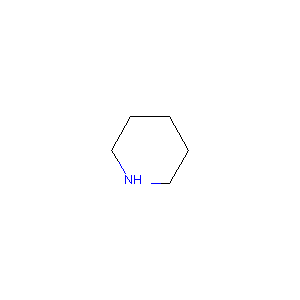

In [11]:
# C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
#N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1
#C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
#smile = 'Nc2cncc(-c3nncn3C)c2'
smile =  smiles[i]
smile = 'C1CNCCC1'
print(i, smile)
mol = Chem.MolFromSmiles(smile)
parse_tree = parse(codec._tokenize(smile))
if parse_tree is None:
    print('fail!')


MolToImage(mol, kekulize=False)


In [12]:
# i+=1
# my_smile =smiles[i]
# mols = [Chem.MolFromSmiles(my_smile)]
# print(i, my_smile, [Descriptors.NumAromaticRings(m) for m in mols])
# MolsToGridImage(mols, kekulize=False)


In [13]:

# from generative_playground.models import grammar_ed_models as grammar_model

# # We load the auto-encoder
# grammar_weights = '../pretrained/my_molecules.mdl'
# grammar_model = grammar_model.ZincGrammarModel(grammar_weights)
# z = grammar_model.encode(['c1nccc2n1ccc2'])
# new_smile = grammar_model.decode(z)